In [1]:
%matplotlib inline
from IPython.core.display import HTML
from IPython.display import YouTubeVideo
from pandas_datareader import data, wb

import os
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

path1 = os.path.join(os.getcwd(),'style-table.css')
path2 = os.path.join(os.getcwd(),'style-notebook.css')

css = open(path1).read() + open(path2).read()
HTML('<style>{}</style>'.format(css))

### 0. Read in data

In [19]:
# read in titanic data
titanic = pd.read_csv('train.csv')

In [20]:
# add an extra male/female/child column
# this is a column not an index, so set axis=1

def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

titanic['Person'] = titanic[['Age','Sex']].apply(male_female_child,axis=1)

In [6]:
# equivalent to summary() in R
# we have a lot of nulls for the Cabin variable

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Person         891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 97.5+ KB


In [4]:
# all good data analysis projects begin with
# answering some questions. We will answer a
# few in this notebook.

### 1. Who were the passengers of the Titanic (Age, Gender, Class) ?

### Age

In [17]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S,male


In [6]:
# get age breakdown in 10s

titanic.groupby(titanic['Age'] // 10 * 10).size()

Age
0      62
10    102
20    220
30    167
40     89
50     48
60     19
70      6
80      1
dtype: int64

In [7]:
# another method for age breakdown

(titanic['Age'] // 10 * 10).value_counts().sort_index()

0      62
10    102
20    220
30    167
40     89
50     48
60     19
70      6
80      1
Name: Age, dtype: int64

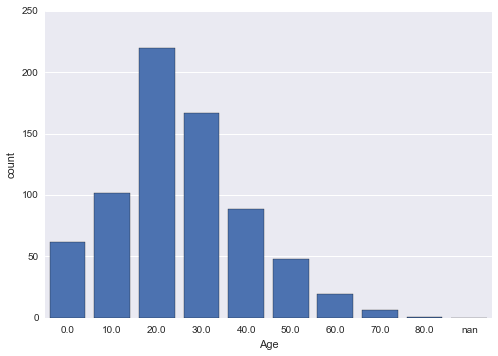

In [8]:
# age distribution 1
sns.barplot(titanic['Age'] // 10 * 10)

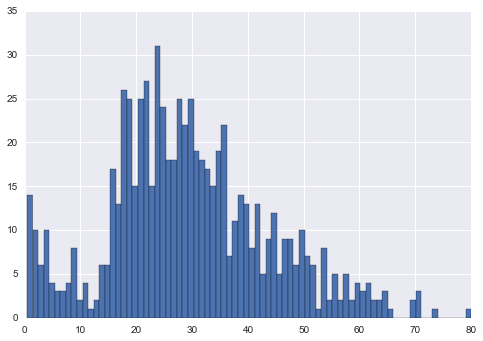

In [61]:
# age distribution 2
titanic['Age'].hist(bins=80)

In [62]:
titanic['Age'].mean()

29.69911764705882

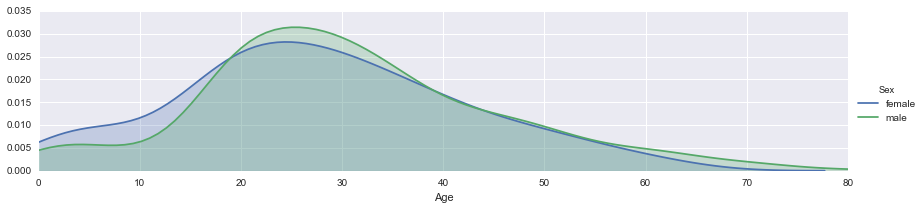

In [15]:
# facetgrid, hue = 3rd variable, aspect = to stretch out
# map the kdeplot to the age column

fig = sns.FacetGrid(titanic,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

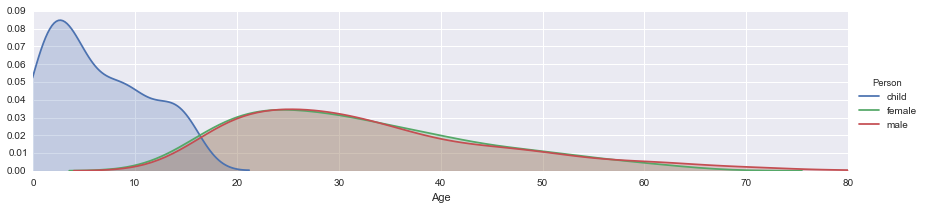

In [19]:
# pass person to hue, to factor in for children

fig = sns.FacetGrid(titanic,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

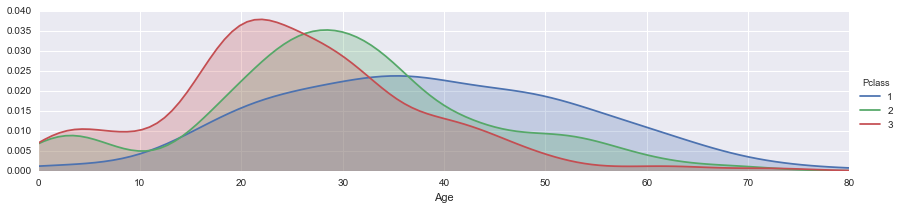

In [23]:
# pass pclass as hue

fig = sns.FacetGrid(titanic,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

### Gender

In [9]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

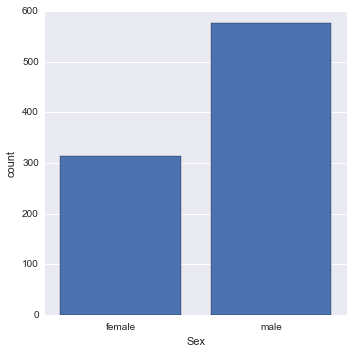

In [10]:
sns.factorplot('Sex',data=titanic)

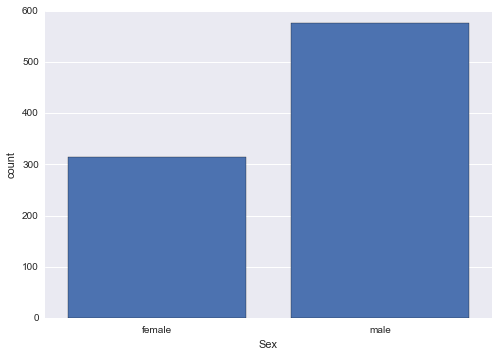

In [11]:
sns.barplot(titanic['Sex'])

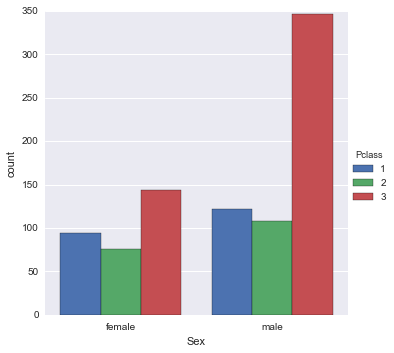

In [15]:
# plot gender + class as hue

sns.factorplot('Sex',data=titanic,hue='Pclass')

### Class

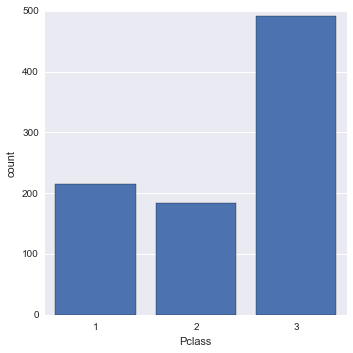

In [13]:
sns.factorplot('Pclass',data=titanic)

In [12]:
titanic.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

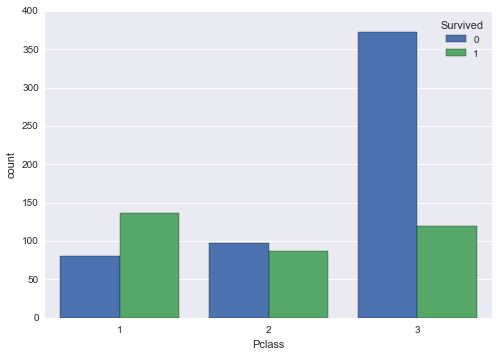

In [33]:
sns.barplot('Pclass',data=titanic,hue='Survived')

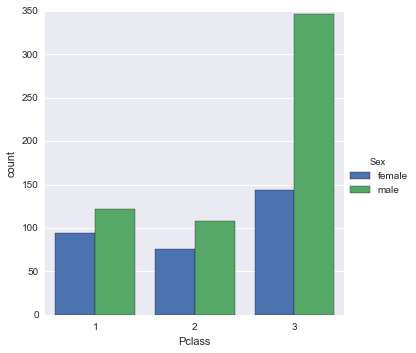

In [19]:
# plot class and gender as hue

sns.factorplot('Pclass',data=titanic,hue='Sex')

### Gender (including children)

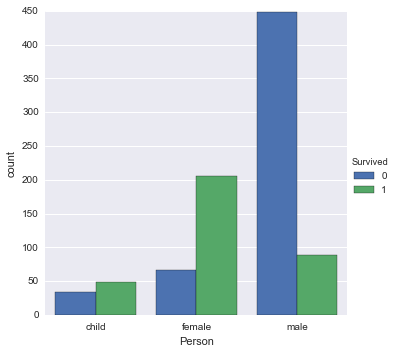

In [5]:
sns.factorplot('Person',data=titanic,hue='Survived')

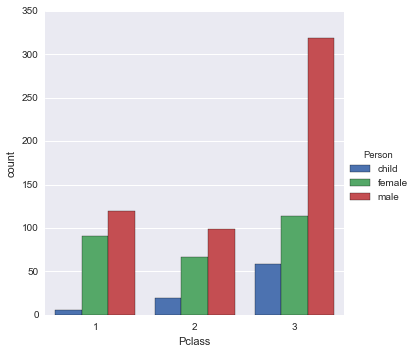

In [54]:
sns.factorplot('Pclass',data=titanic,hue='Person')

In [49]:
titanic['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

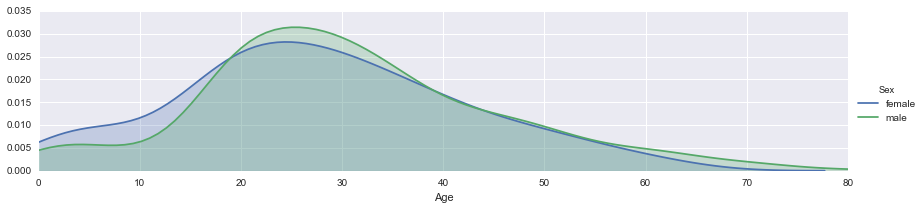

In [63]:
# make multiple plots on 1 figure with FacetGrid
# aspect ratio will be 4
# map all possible kdeplots for the Age column

fig = sns.FacetGrid(titanic,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

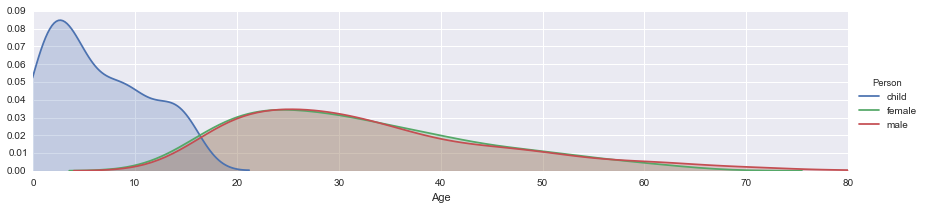

In [64]:
fig = sns.FacetGrid(titanic,hue='Person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

### 2. What deck were the passengers on and how does that relate to their class?

In [4]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S


In [6]:
df2 = titanic[['Cabin','Pclass']].dropna()

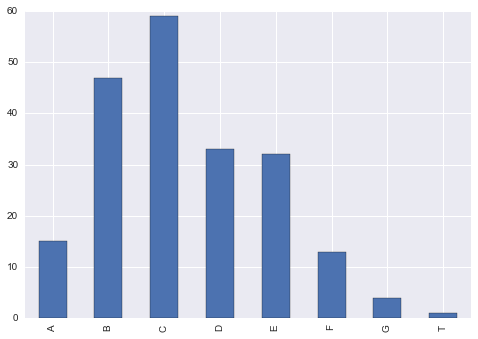

In [7]:
df2['Cabin'].str[:1].value_counts().sort_index().plot(kind='bar')

In [8]:
# make a new column with first letter of Cabin values

df2['Deck'] = df2['Cabin'].str[:1]

In [9]:
# same as above using a for loop instead of .str

levels = []

for level in df2['Cabin']:
    levels.append(level[0])
    
levels = pd.Series(levels)
levels.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
dtype: int64

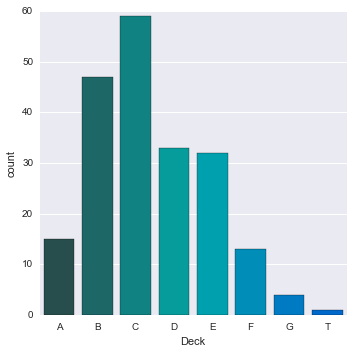

In [10]:
sns.factorplot('Deck',data=df2,palette='winter_d')

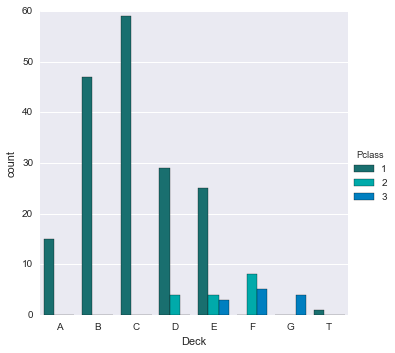

In [11]:
# matplotlib colormaps = range of palettes

sns.factorplot('Deck',data=df2,hue='Pclass',palette='winter_d')

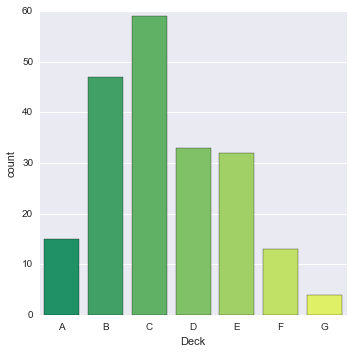

In [14]:
# make a df without Deck T and plot it

df3 = df2[df2['Deck'] != 'T']
sns.factorplot('Deck',data=df3,palette='summer')

### Which cities did the passengers come from?

In [10]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female


In [21]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

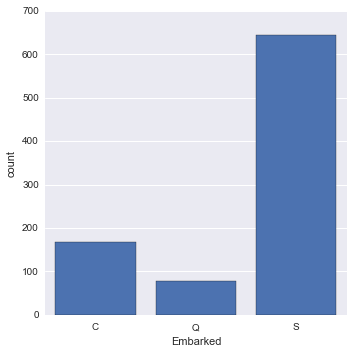

In [25]:
# remember to specify an order

sns.factorplot('Embarked',data=titanic,x_order=['C','Q','S'])

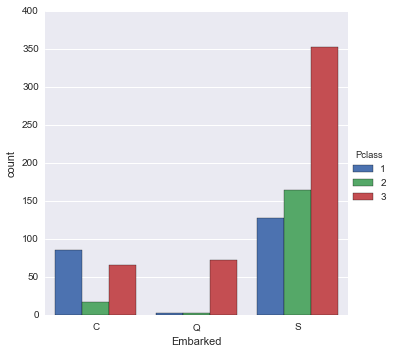

In [27]:
# remember to specify an order

sns.factorplot('Embarked',hue='Pclass',
               data=titanic,x_order=['C','Q','S'])